In [1]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import *
from sklearn.naive_bayes import *
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

#Per linear classification
from sklearn.linear_model import Perceptron
from sklearn import svm

print('Libraries imported.')


Libraries imported.


In [2]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 6.3 MB/s 
time: 633 µs (started: 2022-12-06 17:29:40 +00:00)


In [275]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive
time: 4.42 s (started: 2022-12-06 19:23:25 +00:00)


In [276]:
filename = '/content/drive/MyDrive/ColabNotebooks/MachineLearning/HomeWork1_Dataset.tsv'
df = pd.read_csv(filename, sep='\t', header=0)
print('File loaded: %d samples.' %(len(df)))
print("Number of columns: ", len(df.columns))

File loaded: 1000 samples.
Number of columns:  37
time: 30.4 ms (started: 2022-12-06 19:23:32 +00:00)


In [277]:
X_all = df.iloc[:,:35]
classification_y_all = df['num_collisions']
regression_y_all = df['min_CPA']


#apply normalization
X_normalized = X_all.copy()
for column in X_normalized.columns:
  X_normalized[column] = (X_normalized[column] - X_normalized[column].min()) / (X_normalized[column].max() - X_normalized[column].min())    


reg_y_all_normalized = regression_y_all.copy()
reg_y_all_normalized = (reg_y_all_normalized - reg_y_all_normalized.min()) / (reg_y_all_normalized.max() - reg_y_all_normalized.min())    


time: 53.2 ms (started: 2022-12-06 19:23:34 +00:00)


#Divisione del dataset normalizzato in train set e training set

In [264]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X_normalized,classification_y_all,train_size=0.66,random_state=200)

print("Dataset x train :", x_train.shape)
print("Dataset y train :", y_train.shape)
print("Dataset x test :", x_test.shape)
print("Dataset y test :", y_test.shape)

Dataset x train : (660, 35)
Dataset y train : (660,)
Dataset x test : (340, 35)
Dataset y test : (340,)
time: 11.3 ms (started: 2022-12-06 19:22:28 +00:00)


#DT E RANDOM FORESt Su NON BILANCIATO

In [278]:
from sklearn import tree
from sklearn.metrics import accuracy_score

time: 1.1 ms (started: 2022-12-06 19:24:27 +00:00)


In [279]:
dt_clf = tree.DecisionTreeClassifier(max_depth=10)
dt_clf.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=10)

time: 39.5 ms (started: 2022-12-06 19:24:28 +00:00)


In [280]:
y_pred = dt_clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.4264705882352941

time: 12.5 ms (started: 2022-12-06 19:24:29 +00:00)


              precision    recall  f1-score   support

           0       0.56      0.57      0.56       181
           1       0.32      0.35      0.33       107
           2       0.15      0.14      0.14        36
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00         2

    accuracy                           0.43       340
   macro avg       0.21      0.21      0.21       340
weighted avg       0.41      0.43      0.42       340



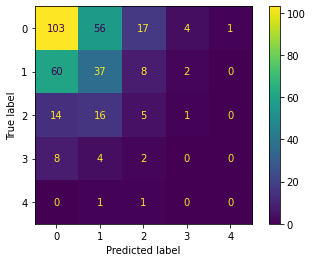

time: 250 ms (started: 2022-12-06 19:24:31 +00:00)


In [281]:
report = classification_report(y_test,y_pred)
confusion = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion)

print(report)
displ.plot()

In [282]:
from sklearn.ensemble import RandomForestClassifier

time: 725 µs (started: 2022-12-06 19:24:34 +00:00)


In [283]:
clf_randomforest = RandomForestClassifier(random_state=0,max_depth=10, n_estimators=10)
clf_randomforest.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=0)

time: 49.4 ms (started: 2022-12-06 19:24:36 +00:00)


In [284]:
y_pred = clf_randomforest.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.47058823529411764
time: 9.44 ms (started: 2022-12-06 19:24:38 +00:00)


              precision    recall  f1-score   support

           0       0.53      0.73      0.61       181
           1       0.31      0.25      0.28       107
           2       0.00      0.00      0.00        36
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00         2

    accuracy                           0.47       340
   macro avg       0.17      0.20      0.18       340
weighted avg       0.38      0.47      0.41       340



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


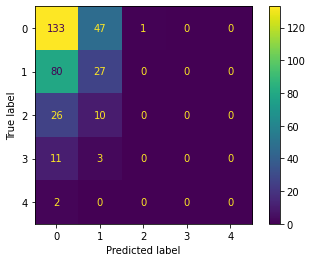

time: 253 ms (started: 2022-12-06 19:24:41 +00:00)


In [285]:
report = classification_report(y_test,y_pred)
confusion = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion)

print(report)
displ.plot()


#Bilanciamento del Dataset

In [286]:
from imblearn.over_sampling import SMOTE 
import matplotlib.pyplot as plt
sm = SMOTE(random_state=42, k_neighbors=2)
X_res, y_res = sm.fit_resample(X_normalized, classification_y_all)

time: 39.4 ms (started: 2022-12-06 19:24:44 +00:00)


Text(0.5, 1.0, 'Dataset distibution over the number of collisions (resampled)')

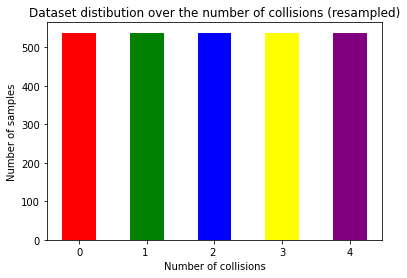

time: 153 ms (started: 2022-12-06 19:24:49 +00:00)


In [287]:
occorrenze_collisioni = y_res.value_counts()
fig,ax = plt.subplots()

ax.bar(x=['0','1 ','2 ','3','4'],height=occorrenze_collisioni,width=0.5, color = ['red','green','blue','yellow','purple'])
ax.set_xlabel ("Number of collisions")
ax.set_ylabel ("Number of samples")
ax.set_title('Dataset distibution over the number of collisions (resampled)')

In [288]:
from sklearn.utils import shuffle

indexes = np.arange(X_res.shape[0])
shuffled_indexes = shuffle(indexes)


X_balanced = X_res.to_numpy()[shuffled_indexes]
y_balanced = y_res.to_numpy()[shuffled_indexes]

time: 4.59 ms (started: 2022-12-06 19:24:54 +00:00)


In [289]:
x_train_balanced, x_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced,y_balanced,train_size=0.66,random_state=200)
print("Balanced Dataset x train :", x_train_balanced.shape)
print("Balanced Dataset y train :", y_train_balanced.shape)
print("Balanced Dataset x test :", x_test_balanced.shape)
print("Balanced Dataset y test :", y_test_balanced.shape)

Balanced Dataset x train : (1775, 35)
Balanced Dataset y train : (1775,)
Balanced Dataset x test : (915, 35)
Balanced Dataset y test : (915,)
time: 13.8 ms (started: 2022-12-06 19:25:07 +00:00)


In [273]:
def setdiff_nd_positivenums_searchsorted(a,b):
    s = np.maximum(a.max(0)+1,b.max(0)+1)
    a1D,b1D = a.dot(s),b.dot(s)
    b1Ds = np.sort(b1D)
    return a[b1Ds[np.searchsorted(b1Ds,a1D)] != a1D]

time: 1.68 ms (started: 2022-12-06 19:23:09 +00:00)


In [291]:
intersezione = setdiff_nd_positivenums_searchsorted(x_test,x_train_balanced)

time: 5.64 ms (started: 2022-12-06 19:25:25 +00:00)


In [292]:
indici = intersezione.T.head(1).T

time: 2.37 ms (started: 2022-12-06 19:25:27 +00:00)


In [293]:
idx_df = pd.DataFrame()
idx_df['indici'] = indici.index

time: 4.43 ms (started: 2022-12-06 19:25:29 +00:00)


In [294]:
idx_criminali = idx_df.to_numpy().reshape(-1,1).squeeze()
print(idx_criminali.shape)

(214,)
time: 2.16 ms (started: 2022-12-06 19:25:32 +00:00)


In [295]:
#Bisogna eliminare da x_train_balanced l'intersezione
new_x_train_balanced = np.delete(x_train_balanced,idx_criminali,axis=0)
new_y_train_balanced = np.delete(y_train_balanced,idx_criminali,axis=0)

time: 2.79 ms (started: 2022-12-06 19:25:36 +00:00)


In [296]:
print(new_x_train_balanced.shape)
print(new_y_train_balanced.shape)

(1561, 35)
(1561,)
time: 1.76 ms (started: 2022-12-06 19:25:45 +00:00)


#Vedere la nuova distribuzione

Text(0.5, 1.0, 'Dataset distibution over the number of collisions (resampled pt 2)')

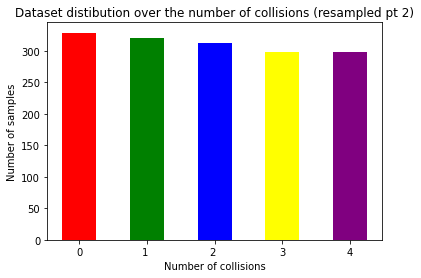

time: 267 ms (started: 2022-12-06 19:38:25 +00:00)


In [315]:
occorrenze_collisioni = pd.Series(new_y_train_balanced).value_counts()
fig,ax = plt.subplots()
ax.bar(x=['0','1 ','2 ','3','4'],height=occorrenze_collisioni,width=0.5, color = ['red','green','blue','yellow','purple'])
ax.set_xlabel ("Number of collisions")
ax.set_ylabel ("Number of samples")
ax.set_title('Dataset distibution over the number of collisions (resampled pt 2)')

In [318]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

clf_randomforest = RandomForestClassifier(random_state=0,max_depth=10, n_estimators=10)
clf_randomforest.fit(new_x_train_balanced, new_y_train_balanced)

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=0)

time: 73.3 ms (started: 2022-12-06 20:02:09 +00:00)


In [320]:
y_pred = clf_randomforest.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.8058823529411765
time: 13 ms (started: 2022-12-06 20:02:14 +00:00)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.88      0.75      0.81       181
           1       0.72      0.84      0.78       107
           2       0.73      0.92      0.81        36
           3       0.93      0.93      0.93        14
           4       1.00      1.00      1.00         2

    accuracy                           0.81       340
   macro avg       0.85      0.89      0.87       340
weighted avg       0.82      0.81      0.81       340



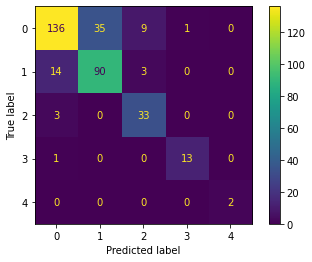

time: 250 ms (started: 2022-12-06 20:02:23 +00:00)


In [321]:
report = classification_report(y_test,y_pred)
confusion = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion)

print(report)
displ.plot()
